In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Group03.zip

Archive:  /content/drive/MyDrive/Group03.zip
   creating: Group03/
   creating: Group03/Classification/
   creating: Group03/Classification/Image_Group03/
   creating: Group03/Classification/Image_Group03/test/
   creating: Group03/Classification/Image_Group03/test/botanical_garden/
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaestfykdspfjxqz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aajgmzsvuhejexcq.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaqfmkvdwukffrst.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acbeefkxpymwevpk.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acghfkorvlqvksjz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackdwnmnaehpqggg.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackzydggopidfvhd.jpg  
  inflating: Group03/Cl

In [3]:
import numpy as np
from random import random


class MLP(object):
    

    def __init__(self, input=3, hidden=[3, 3], output=2):
        

        self.input = input
        self.hidden = hidden
        self.output = output
        self.e = []

        layers = [input] + hidden + [output]

        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        der = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            der.append(d)
        self.der = der

        activ = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activ.append(a)
        self.activ = activ


    def forward_propagate(self, inputs):
        

        activ = inputs
        

        self.activ[0] = activ

        for i, w in enumerate(self.weights):
            net_inputs = np.dot(activ, w)

            activ = self._sigmoid(net_inputs)


            self.activ[i + 1] = activ

        return activ


    def back_propagate(self, error):
       

        for i in reversed(range(len(self.der))):

            activ = self.activ[i+1]

            delta = error * self._sigmoid_derivative(activ)

            delta_re = delta.reshape(delta.shape[0], -1).T

            current_activ = self.activ[i]

            current_activ = current_activ.reshape(current_activ.shape[0],-1)

            self.der[i] = np.dot(current_activ, delta_re)

            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
        
        for i in range(epochs):
            sum_errors = 0

            for j, input in enumerate(inputs):
                target = targets[j]

                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                
                self.gradient_descent(learning_rate)

                sum_errors += self._mse(target, output)

           
            self.e.append(sum_errors / len(inputs))
        

    


    def _sigmoid(self, x):
        

        y = 1.0 / (1 + np.exp(-x))
        return y

    def gradient_descent(self, learningRate=1):
       
        for i in range(len(self.weights)):
            weights = self.weights[i]
            der = self.der[i]
            weights += der * learningRate



    def _sigmoid_derivative(self, x):
       
        return x * (1.0 - x)


    def _mse(self, target, output):
        
        return np.average((target - output) ** 2)



In [4]:
import pandas as pd


In [ ]:
# def predict(test):
#   predicted = [0 for i in range(len(test))]
#   predict12 = model1.forward_propagate(test)
#   predict23 = model2.forward_propagate(test)
#   predict31 = model3.forward_propagate(test)
#   print(predict12)
#   print(predict23)
    
#   print(predict31)

#   for i in range(len(test)):
    
    
#     if (predict12[i]<0.5 and predict31[i]>0.5):predicted[i] = 1;
#     elif (predict23[i]<.5 and predict12[i]>.5):
#       predicted[i]=2;
#     else :
#       predicted[i]=3;
#   return predicted ;



In [5]:

data1 = pd.read_csv('Group03/Classification/LS_Group03/Class1.txt', sep=" ", header=None)
data2 = pd.read_csv('Group03/Classification/LS_Group03/Class2.txt', sep=" ", header=None)
data3 = pd.read_csv('Group03/Classification/LS_Group03/Class3.txt', sep=" ", header=None)

train1,train2,train3 = data1[0:300],data2[0:300],data3[0:300]
test1,test2,test3 = data1[300:400],data2[300:400],data3[300:400]
validate1,validate2,validate3 = data1[400:500],data2[400:500],data3[400:500]

set0_y = np.zeros(shape = 300)
set1_y = np.ones(shape = 300)
set3_y = np.empty(300)
# set3.fill(2)
X12=np.concatenate([train1,train2])
y12=np.concatenate([set0_y,set1_y])
X31=np.concatenate([train3,train1])
y31=np.concatenate([set0_y,set1_y])

X23=np.concatenate([train2,train3])
y23=np.concatenate([set0_y,set1_y])


# model1 = MLP(2, [5], 1)
# model1.train(X12, y12, 50, 0.1)
# model2=MLP(2, [5], 1)
# model2.train(X23, y23, 50, 0.1) 

# model3=MLP(2, [5], 1)
# model3.train(X31, y31, 50, 0.1) 




# model12 = MLP(2, [5], 1)
# model12.train(X12, y12, 50, 0.1) 
# model31=MLP(2, [5], 1)
# model31.train(X31, y31, 50, 0.1)
# model23=MLP(2, [5], 1)
# model23.train(X23, y23, 50, 0.1) 






In [ ]:
# predict(test2)
# model1.forward_propagate(test2)

In [6]:
def findclass(x1,x2): 
  one=0
  two=0
  three=0
  # test = [test3.iloc[0][0],test3.iloc[0][1]]
  test = [x1,x2]
  val = model11.forward_propagate(test)
  one+=(1-val[0])
  two+=val[0]
  val = model22.forward_propagate(test)
  two+=(1-val[0])
  three+=val[0]
  val = model33.forward_propagate(test)
  three+=(1-val[0])
  one+=val[0]
  if(max(one,two,three)==one):return 1;
  if(max(one,two,three)==two):return 2;
  if(max(one,two,three)==three):return 3;






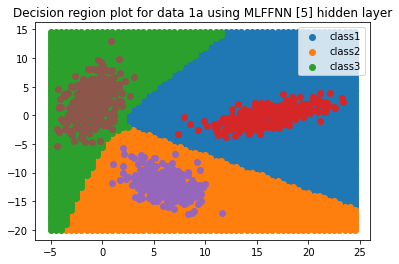

100 0 0
0 100 0
0 0 100


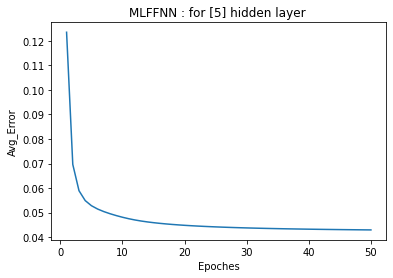

In [7]:
# findclass(test1.iloc[0][0],test1.iloc[0][1])
import matplotlib.pyplot as plt

model22=MLP(2, [5], 1)
model22.train(X23, y23, 50, 0.1) 
model22.forward_propagate([1,2])

model11 = MLP(2, [5], 1)
model11.train(X12, y12, 50, 0.1)

model33=MLP(2, [5], 1)
model33.train(X31, y31, 50, 0.1) 


# plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1],label='class1')
# plt.scatter(data2.iloc[:, 0], data2.iloc[:, 1],label='class2')
# plt.scatter(data3.iloc[:, 0], data3.iloc[:, 1],label='class3')
# plt.legend()
# plt.show()
x1grid = np.arange(-5, 25, 0.5)
x2grid = np.arange(-20, 15, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 




cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision region plot for data 1a using MLFFNN [5] hidden layer")

plt.legend()
plt.show()


error1 = model11.e
error2 = model22.e
error3= model33.e 
epoch = [i for i in range(1,51)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("MLFFNN : for [5] hidden layer ")

predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]
for i in range(3):
  print(*cm[i])

  








# for i in 









[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

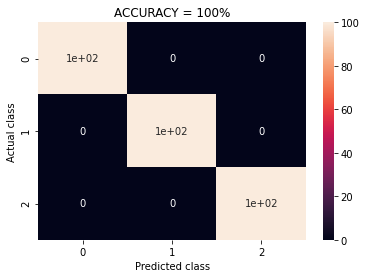

In [8]:
import seaborn as sns
plt.title("ACCURACY = 100%",)
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")

# plt.show()

cl1=  pd.DataFrame(cl1)
cl2=  pd.DataFrame(cl2)
cl3=  pd.DataFrame(cl3)

plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1')
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2')
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3')
plt.legend()
plt.show()



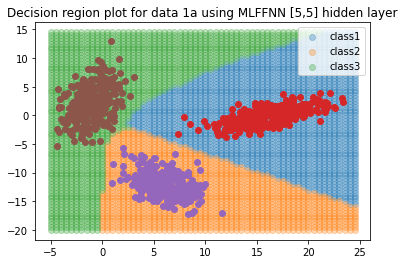

100 0 0
0 100 0
0 0 100


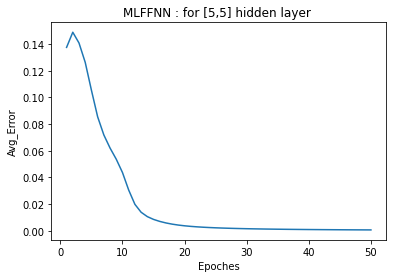

In [9]:
model22=MLP(2, [5,5], 1)
model22.train(X23, y23, 50, 0.1) 
model22.forward_propagate([1,2])

model11 = MLP(2, [5,5], 1)
model11.train(X12, y12, 50, 0.1)

model33=MLP(2, [5,5], 1)
model33.train(X31, y31, 50, 0.1) 



x1grid = np.arange(-5, 25, 0.5)
x2grid = np.arange(-20, 15, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 



cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=0.3)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=0.3)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=0.3)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision region plot for data 1a using MLFFNN [5,5] hidden layer")

plt.legend()
plt.show()

error1 = model11.e
error2 = model22.e
error3= model33.e 
epoch = [i for i in range(1,51)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("MLFFNN : for [5,5] hidden layer ")


predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]
for i in range(3):
  print(*cm[i])



[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

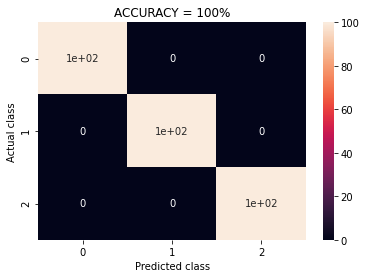

In [10]:
import seaborn as sns
plt.title("ACCURACY = 100%",)
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")

# plt.show()

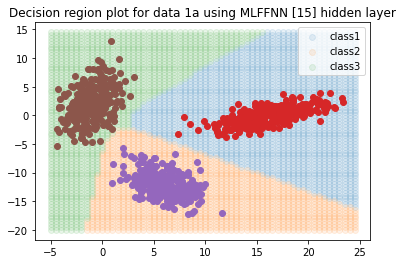

Text(0.5, 1.0, 'MLFFNN : for [15] hidden layer ')

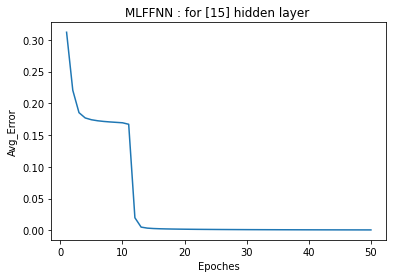

In [11]:
model22=MLP(2, [15], 1)
model22.train(X23, y23, 50, 0.1) 
model22.forward_propagate([1,2])

model11 = MLP(2, [15], 1)
model11.train(X12, y12, 50, 0.1)

model33=MLP(2, [15], 1)
model33.train(X31, y31, 50, 0.1) 



x1grid = np.arange(-5, 25, 0.5)
x2grid = np.arange(-20, 15, 0.5)

# x1grid
cl1 =[]
cl2=[]
cl3=[]

for i in range(len(x1grid)):
  for j in range(len(x2grid)):
    cl = findclass(x1grid[i],x2grid[j])
    if (cl==1):cl1.append([x1grid[i],x2grid[j]])
    if (cl==2):cl2.append([x1grid[i],x2grid[j]])
    if (cl==3):cl3.append([x1grid[i],x2grid[j]]) 



cl1= pd.DataFrame(cl1)
cl2= pd.DataFrame(cl2)
cl3= pd.DataFrame(cl3)
plt.scatter(cl1.iloc[:, 0], cl1.iloc[:, 1],label='class1',alpha=0.1)
plt.scatter(cl2.iloc[:, 0], cl2.iloc[:, 1],label='class2',alpha=0.1)
plt.scatter(cl3.iloc[:, 0], cl3.iloc[:, 1],label='class3',alpha=0.1)
plt.scatter(train1.iloc[:, 0], train1.iloc[:, 1])
plt.scatter(train2.iloc[:, 0], train2.iloc[:, 1])
plt.scatter(train3.iloc[:, 0], train3.iloc[:, 1])
plt.title("Decision region plot for data 1a using MLFFNN [15] hidden layer")

plt.legend()
plt.show()

error1 = model11.e
error2 = model22.e
error3= model33.e 
epoch = [i for i in range(1,51)]
total_error = [(error1[i]+error2[i]+error3[i])/3 for i in range(len(error1))]
plt.plot(epoch,total_error)

plt.xlabel("Epoches")
plt.ylabel("Avg_Error")
plt.title("MLFFNN : for [15] hidden layer ")


**confsion matrix**


In [12]:
predict1=[]
predict2=[]
predict3=[]

for i in range(len(test1)):
  c=findclass(test1.iloc[i][0],test1.iloc[i][1])
  predict1.append(c)

for i in range(len(test2)):
  c=findclass(test2.iloc[i][0],test2.iloc[i][1])
  predict2.append(c)

for i in range(len(test3)):
  c=findclass(test3.iloc[i][0],test3.iloc[i][1])
  predict3.append(c)
cm = [[predict1.count(1),predict1.count(2),predict1.count(3)],
      [predict2.count(1),predict2.count(2),predict2.count(3)],
      [predict3.count(1),predict3.count(2),predict3.count(3)]]
for i in range(3):
  print(*cm[i])

  
    











100 0 0
0 100 0
0 0 100


[Text(33.0, 0.5, 'Actual class'), Text(0.5, 15.0, 'Predicted class')]

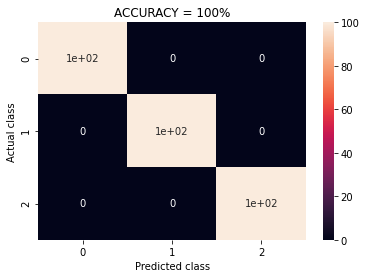

In [13]:
import seaborn as sns
plt.title("ACCURACY = 100%",)
# plt.xlabel("Predicted class")
# plt.ylabel("Actual class")

ax = sns.heatmap(cm, annot=True)

ax.set(xlabel="Predicted class", ylabel = "Actual class")

# plt.show()